In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
dfHouse = pd.read_csv("./Data/houseprice.csv")

In [3]:
dfHouse.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#sns.pairplot(dfHouse, kind='reg', diag_kind='hist')

In [5]:
def diagnostic_plots(pDf, pVariable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    pDf[pVariable].hist(bins=30)

    plt.subplot(1,2,2)
    stats.probplot(pDf[pVariable], dist='norm', plot=plt)

    plt.show()

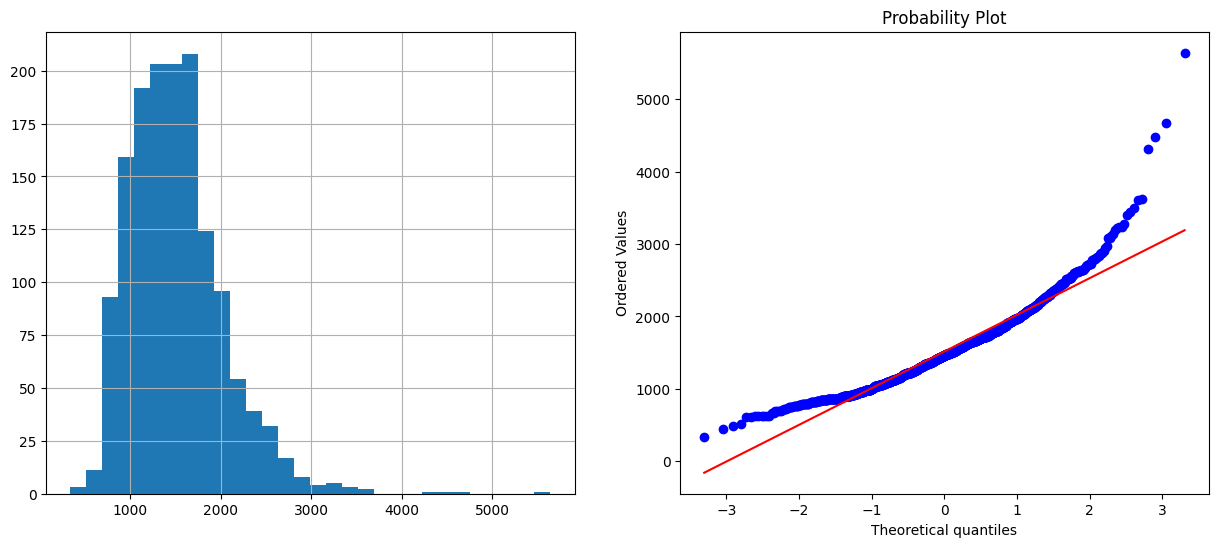

In [6]:
diagnostic_plots(dfHouse, 'GrLivArea')

Optimal lambda:  0.006304924353543215


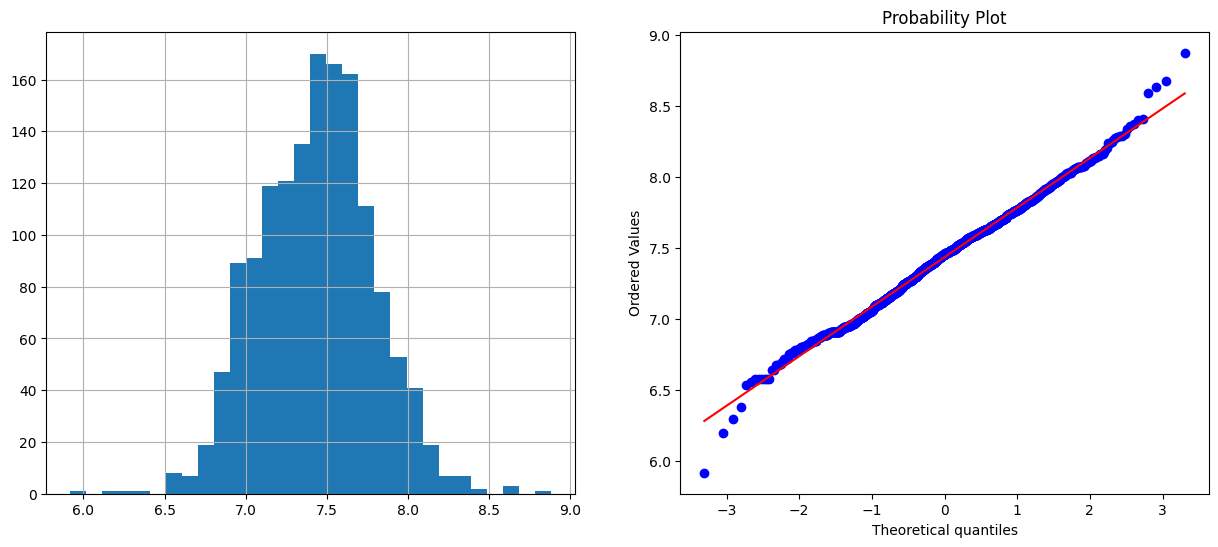

In [7]:
## box-cox
dfHouse['GrLivArea_box_cox'], param = stats.boxcox(dfHouse['GrLivArea'])
print('Optimal lambda: ', param)
diagnostic_plots(dfHouse, 'GrLivArea_box_cox')

Optimal lambda:  0.005539641278705955


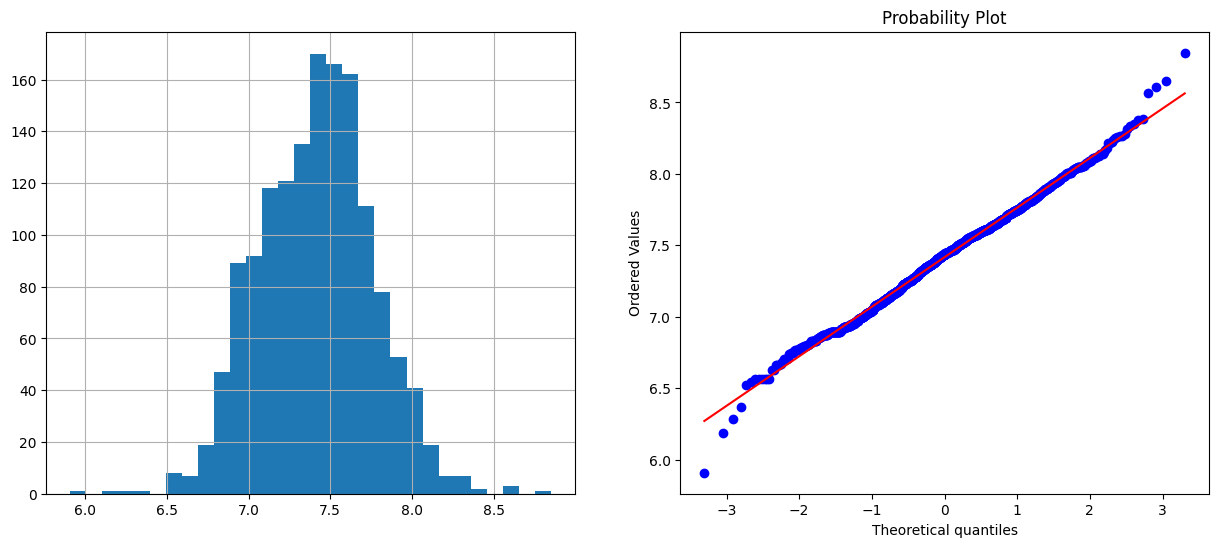

In [8]:
## yeo-johnson
dfHouse['GrLivArea_yeo_johnson'], param = stats.yeojohnson(dfHouse['GrLivArea'].astype('float'))
print('Optimal lambda: ', param)
diagnostic_plots(dfHouse, 'GrLivArea_yeo_johnson')

In [9]:
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [11]:
dfHouse.dtypes

Id                         int64
MSSubClass                 int64
MSZoning                  object
LotFrontage              float64
LotArea                    int64
                          ...   
SaleType                  object
SaleCondition             object
SalePrice                  int64
GrLivArea_box_cox        float64
GrLivArea_yeo_johnson    float64
Length: 83, dtype: object

In [12]:
dfNumeric = dfHouse.select_dtypes(include=np.number)

In [14]:
dfNumeric.drop('Id', axis=1, inplace=True)

In [13]:
dfNumeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'GrLivArea_box_cox',
       'GrLivArea_yeo_johnson'],
      dtype='object')

In [20]:
## delete columns containing negatives
dfNumeric.columns[(dfNumeric<=0).any()].tolist()
dfNumericPositive = dfNumeric.drop(dfNumeric.columns[(dfNumeric<=0).any()].tolist(), axis=1)

In [21]:
dfNumericPositive.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd',
       'GarageYrBlt', 'MoSold', 'YrSold', 'SalePrice', 'GrLivArea_box_cox',
       'GrLivArea_yeo_johnson'],
      dtype='object')


Graphiques pour évaluer la normalité

Pour visualiser la distribution des variables, nous traçons un histogramme et un graphique Q-Q. Dans les pLots Q-Q, si la variable est normalement distribuée, les valeurs de la variable devraient tomber sur une ligne de 45 degrés lorsqu'elles sont tracées par rapport aux quantiles théoriques.


In [26]:
## log transformer with scikit
powerTransf = FunctionTransformer(np.log, validate=True)
powerDf = powerTransf.transform(dfNumericPositive.fillna(1))

/home/hadoop/.local/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [29]:
powerDf = pd.DataFrame(powerDf, columns = dfNumericPositive.columns)

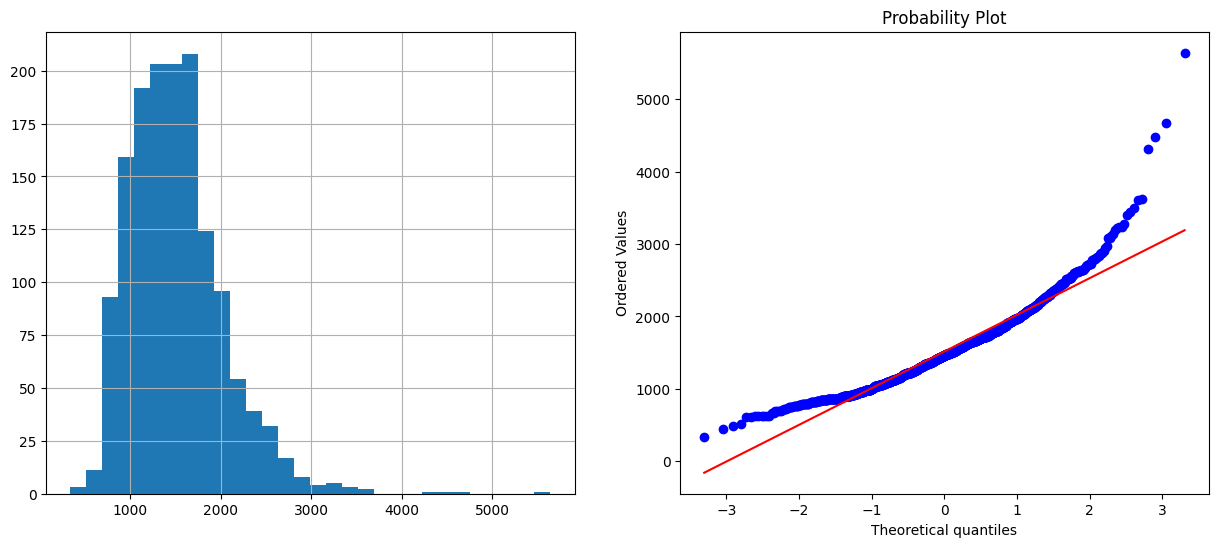

In [31]:
## distrib originale
diagnostic_plots(dfNumericPositive, 'GrLivArea')

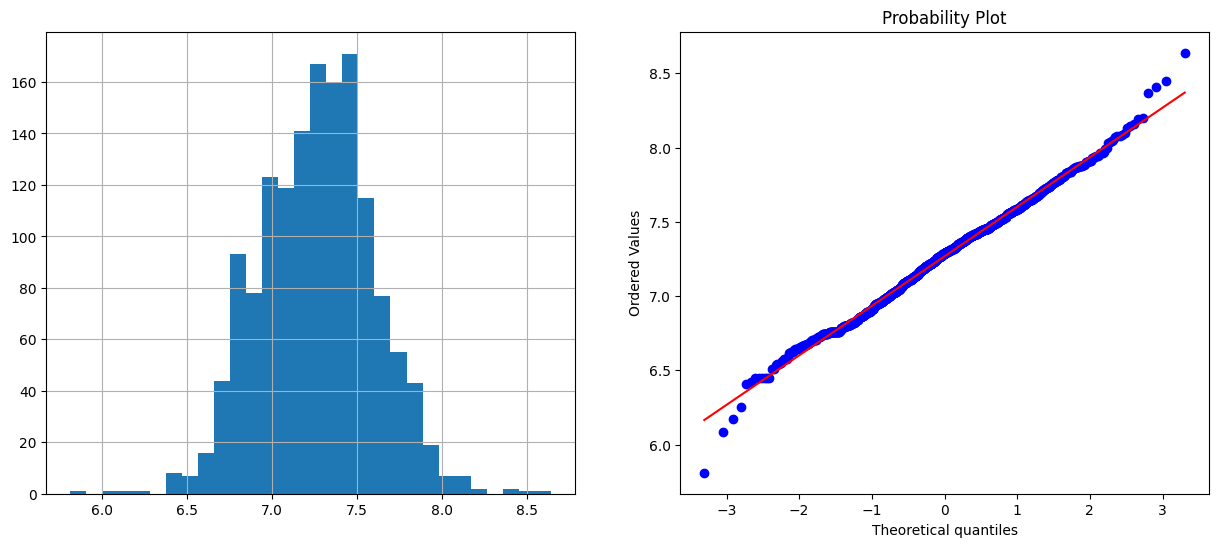

In [32]:
## distrib df transformée
diagnostic_plots(powerDf, 'GrLivArea')

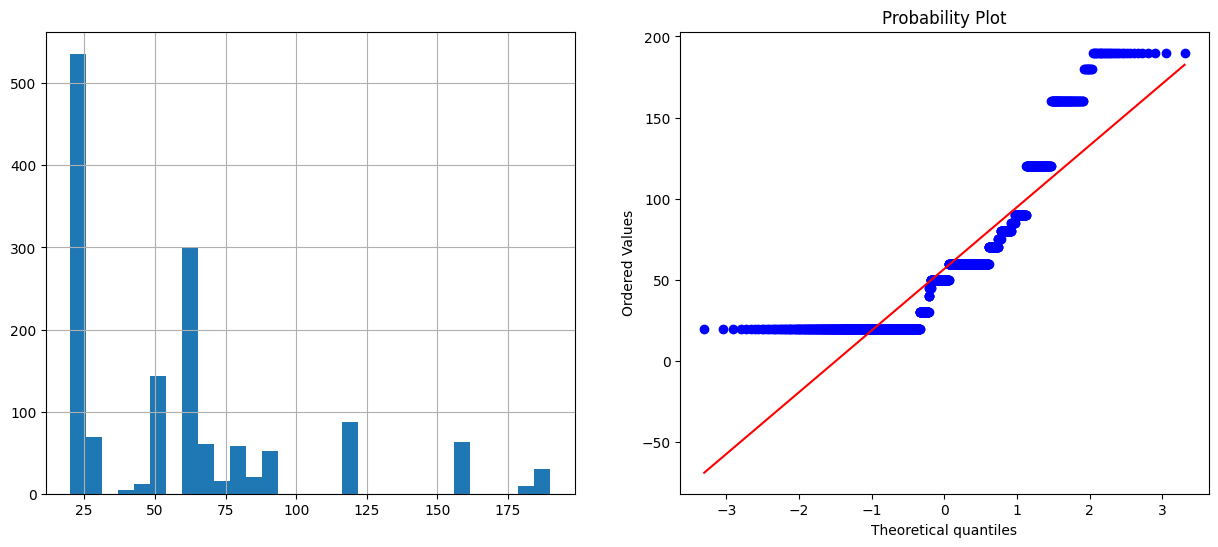

In [33]:
## distrib originale
diagnostic_plots(dfNumericPositive, 'MSSubClass')

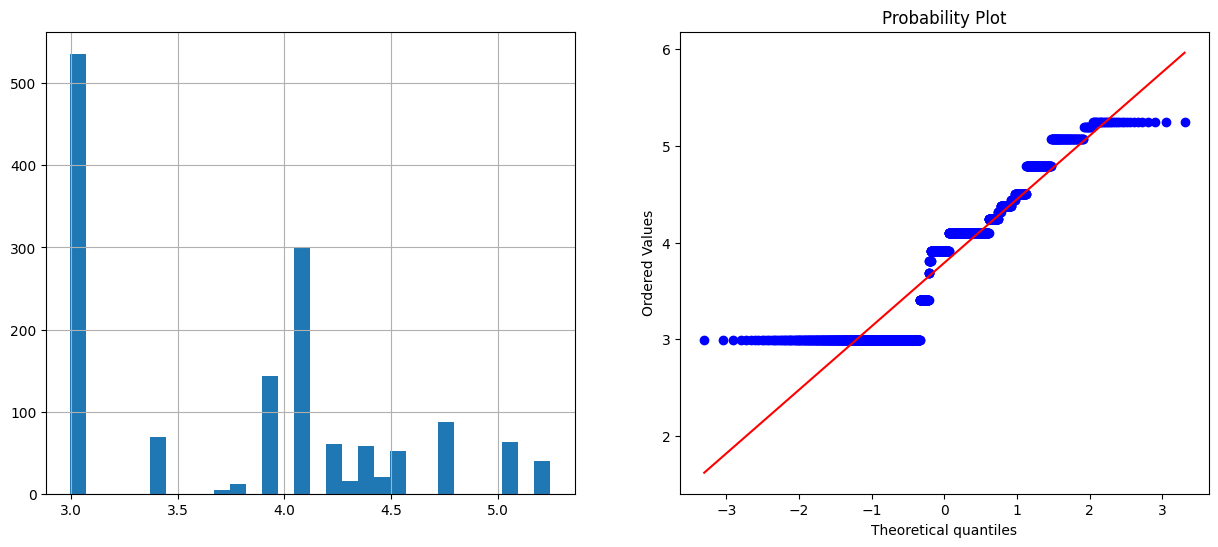

In [34]:
## distrib df transformée
diagnostic_plots(powerDf, 'MSSubClass')

In [38]:
## square root transformer with scikit
sqrtTransf = FunctionTransformer(lambda x: x**(1/2), validate=True)
sqrtDf = sqrtTransf.transform(dfNumericPositive.fillna(1))
sqrtDf = pd.DataFrame(sqrtDf, columns=dfNumericPositive.columns)

/home/hadoop/.local/lib/python3.11/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


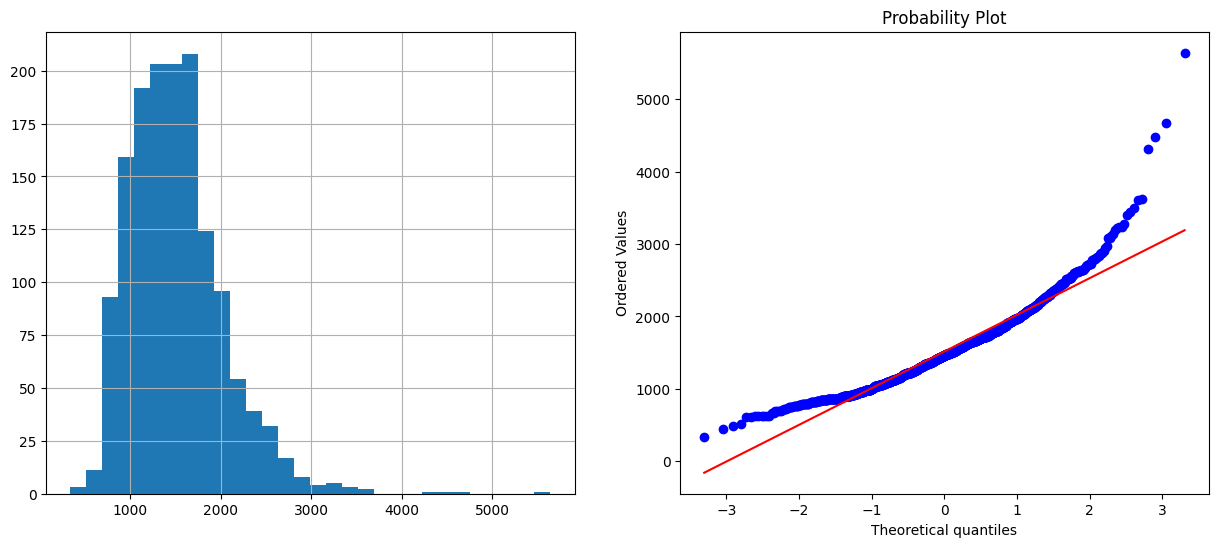

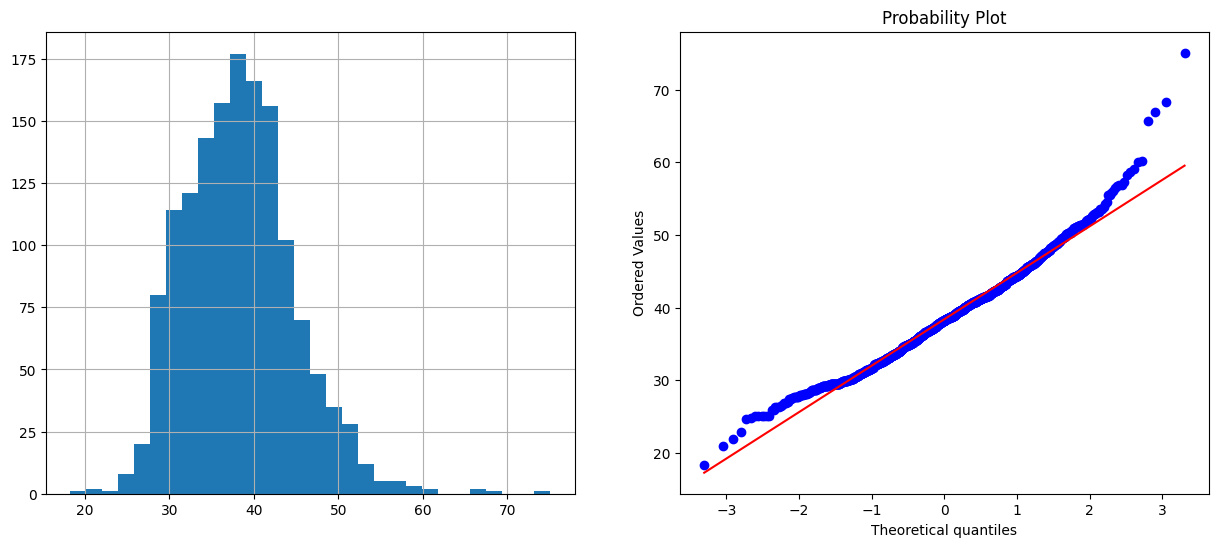

In [39]:
## distrib originale
diagnostic_plots(dfNumericPositive, 'GrLivArea')

## distrib transf
diagnostic_plots(sqrtDf, 'GrLivArea')

In [44]:
## box-coxtransformer with scikit
boxcoxTransf = PowerTransformer(method='box-cox', standardize=False)
boxcoxTransf.fit(dfNumericPositive.fillna(1))
boxcoxDf = boxcoxTransf.transform(dfNumericPositive.fillna(1))
boxcoxDf = pd.DataFrame(boxcoxDf, columns=dfNumericPositive.columns)

/home/hadoop/.local/lib/python3.11/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/hadoop/.local/lib/python3.11/site-packages/scipy/stats/_morestats.py:924: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)


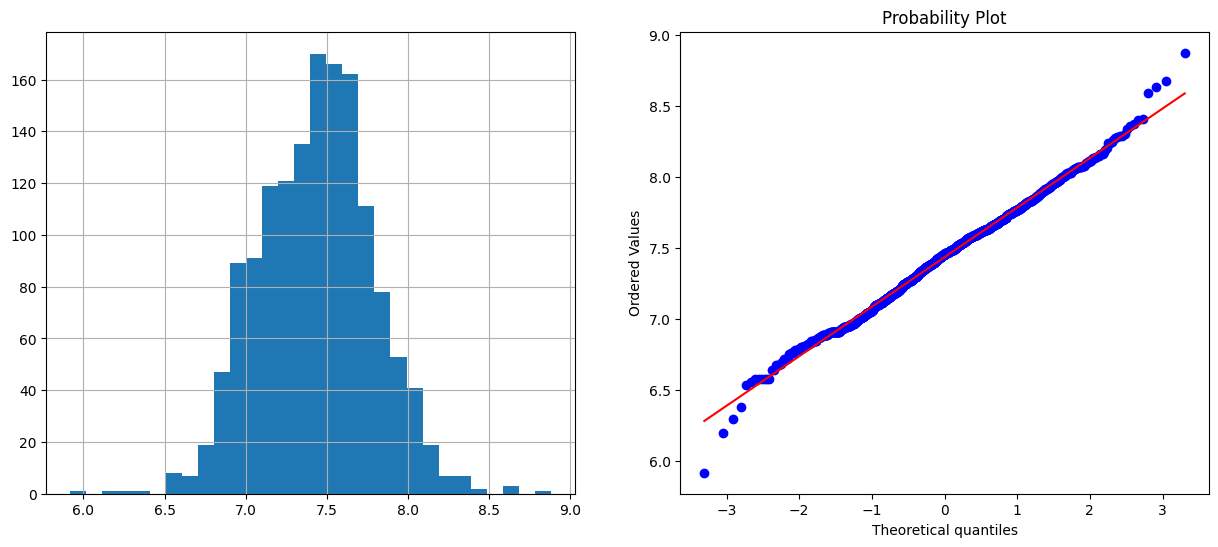

In [45]:
diagnostic_plots(boxcoxDf, 'GrLivArea')

/home/hadoop/.local/lib/python3.11/site-packages/numpy/core/_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


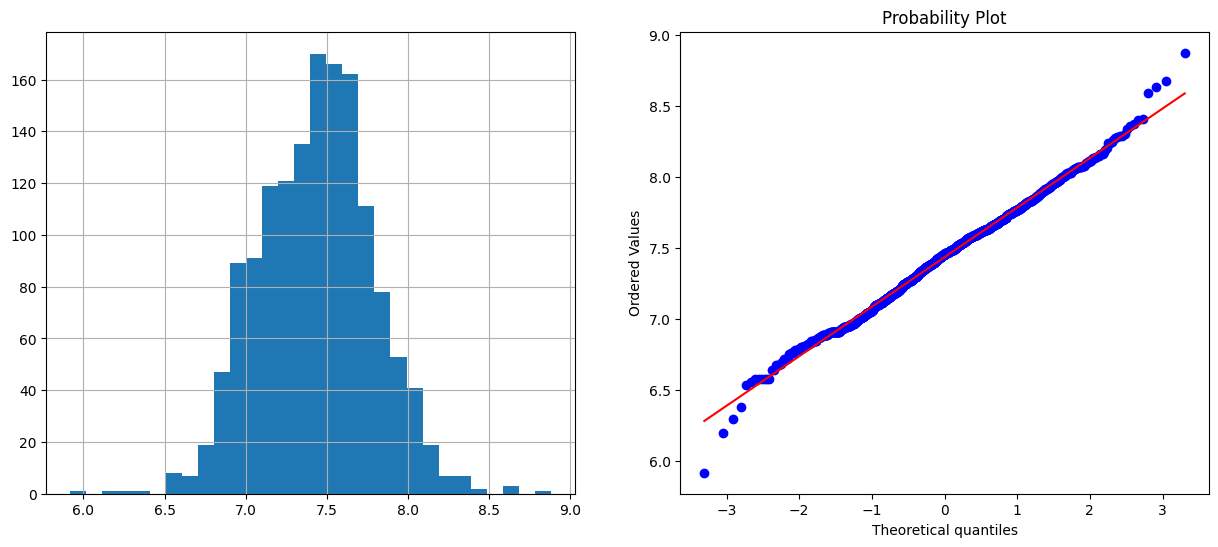

In [47]:
## yeojohnson with scikit
yjTransf = PowerTransformer(method='yeo-johnson', standardize=False)
yjTransf.fit(dfNumericPositive.fillna(1))
yjDf = boxcoxTransf.transform(dfNumericPositive.fillna(1))
yjDf = pd.DataFrame(boxcoxDf, columns=dfNumericPositive.columns)

diagnostic_plots(yjDf, 'GrLivArea')